In [1]:
# creating a database of credit / macro data

from fredapi import Fred
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


In [14]:

fred = Fred(api_key='c86c79e10f6477f3304072ddd403a4e8')

macro_data = pd.DataFrame({
    'BofA US Corp OAS': fred.get_series('BAMLC0A0CM'),
    'BofA US HY OAS': fred.get_series('BAMLH0A0HYM2'),
    'BofA Euro HY OAS': fred.get_series('BAMLHE00EHYIOAS'),
    'Unemployment rate': fred.get_series('UNRATE'),
    'VIX': fred.get_series('VIXCLS'),
    'US 2s10s Spread': fred.get_series('T10Y2Y'), 
    'UST 10yr yield': fred.get_series('DGS10'), 
    'UST 2yr yield': fred.get_series('DGS2'), 
    'DXY': fred.get_series('DTWEXBGS'),
    'EURUSD': fred.get_series('DEXUSEU'), 
    'UMich Consumer Sentiment': fred.get_series('UMCSENT'),
    'S&P 500': fred.get_series('SP500'),
    'Core CPI': fred.get_series('CORESTICKM159SFRBATL')
})

    # 'BofA US Corp 1-3yr OAS': fred.get_series('BAMLC1A0C13Y'),
    # 'BofA US Corp 3-5yr OAS': fred.get_series('BAMLC2A0C35Y'),
    # 'BofA US Corp 5-7yr OAS': fred.get_series('BAMLC3A0C57Y'),
    # 'BofA US Corp 7-10yr OAS': fred.get_series('BAMLC4A0C710Y'),
    # 'BofA US Corp 10-15yr OAS': fred.get_series('BAMLC7A0C1015Y'),
    # 'BofA US Corp 15+yr OAS': fred.get_series('BAMLC8A0C15PY'),


In [15]:
macro_data.describe()

,BofA US Corp OAS,BofA US HY OAS,BofA Euro HY OAS,Unemployment rate,VIX,US 2s10s Spread,UST 10yr yield,UST 2yr yield,DXY,EURUSD,UMich Consumer Sentiment,S&P 500,Core CPI
count,7517.000000,7518.000000,7261.000000,932.000000,9039.000000,12342.000000,15933.000000,12341.000000,4959.000000,6716.000000,664.000000,2515.000000,692.000000
mean,1.476634,5.231474,5.750339,5.670386,19.460366,0.851102,5.825816,4.973080,105.870314,1.182810,84.944127,3673.714103,4.316975
std,0.823200,2.539722,3.470920,1.707418,7.798144,0.919647,2.944306,3.682671,12.342231,0.154183,13.176551,1238.760463,2.663009
min,0.530000,2.410000,1.780000,2.500000,9.140000,-2.410000,0.520000,0.090000,85.469200,0.827000,50.000000,1829.080000,0.663868
25%,0.980000,3.542500,3.490000,4.300000,13.910000,0.180000,3.880000,1.670000,93.650250,1.084275,74.575000,2664.050000,2.463002
50%,1.290000,4.570000,4.630000,5.500000,17.600000,0.800000,5.470000,4.680000,108.604000,1.170600,88.700000,3453.490000,3.379895
75%,1.680000,6.187500,6.780000,6.700000,22.770000,1.480000,7.550000,7.150000,116.148600,1.299625,94.700000,4461.005000,5.165466
max,6.560000,21.820000,23.260000,14.800000,82.690000,2.910000,15.840000,16.950000,130.214200,1.601000,112.000000,6753.720000,15.774167


<Axes: >

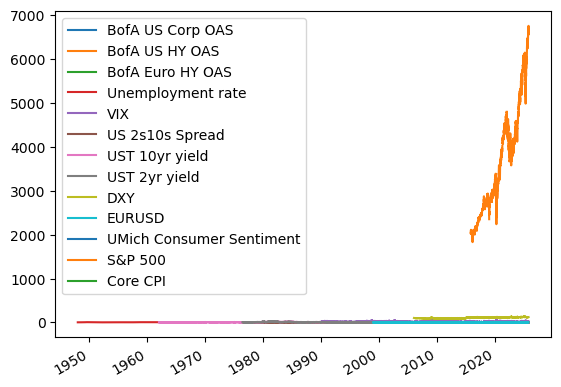

In [17]:
macro_data.plot()

In [19]:
first_dates = macro_data.apply(lambda x: x.first_valid_index())
first_dates

BofA US Corp OAS           1996-12-31
BofA US HY OAS             1996-12-31
BofA Euro HY OAS           1997-12-31
Unemployment rate          1948-01-01
VIX                        1990-01-02
US 2s10s Spread            1976-06-01
UST 10yr yield             1962-01-02
UST 2yr yield              1976-06-01
DXY                        2006-01-02
EURUSD                     1999-01-04
UMich Consumer Sentiment   1952-11-01
S&P 500                    2015-10-19
Core CPI                   1968-01-01
dtype: datetime64[ns]

In [28]:
macro_data_monthly_indicators = macro_data[['Unemployment rate', 'UMich Consumer Sentiment', 'Core CPI']]

In [ ]:
macro_data_monthly_indicators = macro_data_monthly_indicators.loc[macro_data_monthly_indicators.index > '2015-11-01'].dropna()

,Unemployment rate,UMich Consumer Sentiment,Core CPI
2015-12-01,5.0,92.6,2.437497
2016-01-01,4.8,92.0,2.460879
2016-02-01,4.9,91.7,2.538253
2016-03-01,5.0,91.0,2.526214
2016-04-01,5.1,89.0,2.531430
...,...,...,...
2025-04-01,4.2,52.2,3.176690
2025-05-01,4.2,52.2,3.159131
2025-06-01,4.1,60.7,3.288774
2025-07-01,4.2,61.7,3.419811


In [31]:
macro_data_monthly_indicators.to_csv('/Users/henry/Documents/quant_credit/data/macro_indicators_monthly.csv')

In [34]:
macro_data_daily = macro_data.drop(columns=['Unemployment rate', 'UMich Consumer Sentiment', 'Core CPI'])
macro_data_daily = macro_data_daily.loc[macro_data_daily.index > '2015-11-01'].dropna()
macro_data_daily

,BofA US Corp OAS,BofA US HY OAS,BofA Euro HY OAS,VIX,US 2s10s Spread,UST 10yr yield,UST 2yr yield,DXY,EURUSD,S&P 500
2015-11-02,1.65,5.84,4.87,14.15,1.43,2.20,0.77,110.2188,1.1026,2104.05
2015-11-03,1.64,5.77,4.78,14.54,1.43,2.23,0.80,110.2440,1.0946,2109.79
2015-11-04,1.63,5.73,4.70,15.51,1.41,2.25,0.84,110.7139,1.0861,2102.31
2015-11-05,1.62,5.80,4.71,15.05,1.41,2.26,0.85,110.8302,1.0869,2099.93
2015-11-06,1.61,5.82,4.68,14.33,1.44,2.34,0.90,111.7603,1.0746,2099.20
...,...,...,...,...,...,...,...,...,...,...
2025-10-06,0.74,2.76,2.75,16.37,0.58,4.18,3.60,120.7028,1.1707,6740.28
2025-10-07,0.75,2.82,2.79,17.24,0.57,4.14,3.57,120.9097,1.1674,6714.59
2025-10-08,0.75,2.84,2.87,16.30,0.55,4.13,3.58,121.1884,1.1606,6753.72
2025-10-09,0.77,2.95,2.90,16.43,0.54,4.14,3.60,121.4965,1.1559,6735.11


In [35]:
macro_data_daily.to_csv('/Users/henry/Documents/quant_credit/data/macro_data_daily.csv')

In [13]:
data_zscores = (macro_data - macro_data.mean()) / macro_data.std()
data_zscores.describe()

,BofA US Corp OAS,BofA US HY OAS,BofA Euro HY OAS,Unemployment rate,VIX,US 2s10s Spread,UST 10yr yield,UST 2yr yield,DXY,EURUSD,UMich Consumer Sentiment,S&P 500,Core CPI
count,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01
mean,9.678867e-17,5.551115e-17,-3.045997e-16,4.369724e-16,-5.764620e-17,-4.625929e-17,1.679568e-16,-1.281027e-16,1.753583e-15,1.437596e-15,4.213154e-16,-3.302202e-16,2.522911e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.245865e+00,-1.132949e+00,-1.600113e+00,-6.137484e-01,-1.164680e+00,-2.100751e+00,-1.705411e+00,-1.277411e+00,-2.125383e+00,-2.483937e+00,-1.935897e+00,-1.442753e+00,-1.363113e+00
25%,-6.498584e-01,-6.312018e-01,-6.844447e-01,-5.016642e-01,-6.798131e-01,-5.752105e-01,-7.667650e-01,-8.580222e-01,-8.017360e-01,-6.774647e-01,-8.040601e-01,-8.197646e-01,-6.722851e-01
50%,-1.815674e-01,-3.559239e-01,-3.196663e-01,-2.899498e-01,-2.538205e-01,8.326657e-02,-1.068814e-01,-2.436413e-01,-2.049014e-01,-7.967631e-02,3.996669e-02,-1.285743e-02,-5.038023e-01
75%,3.718675e-01,2.629632e-01,5.960020e-01,2.139497e-02,4.222186e-01,8.235420e-01,8.687881e-01,9.433364e-01,8.140041e-01,7.465543e-01,1.000411e+00,7.469307e-01,7.201275e-01
max,5.083159e+00,3.771292e+00,3.481970e+00,5.015365e+00,5.219457e+00,1.825572e+00,1.909793e+00,1.724854e+00,2.201866e+00,2.405101e+00,1.388469e+00,2.270818e+00,2.339830e+00


In [98]:
# have to invert the 2s10s slope z-score since more negative here will generally be a more 'stressed' move

data_zscores['T10Y2Y'] =  data_zscores['T10Y2Y']*-1

/var/folders/5f/wdk48wx96tl8spk9z_l8kr280000gn/T/ipykernel_10730/691884224.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  yf.download('LQD', start='2005-01-01')['Close'].pct_change(),
[*********************100%***********************]  1 of 1 completed
/var/folders/5f/wdk48wx96tl8spk9z_l8kr280000gn/T/ipykernel_10730/691884224.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  yf.download('IEF', start='2005-01-01')['Close'].pct_change()
[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

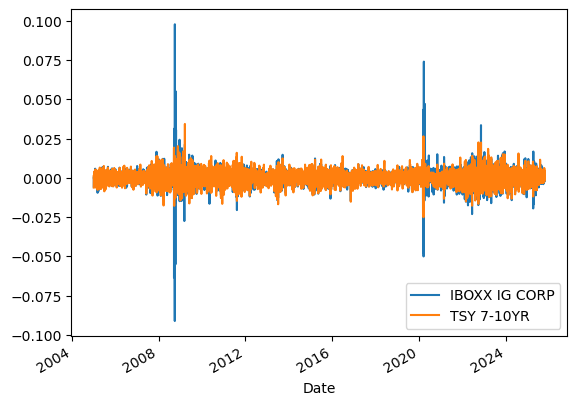

In [100]:
# retrieving mkt index total returns data from yahoo finance

market_returns = pd.concat([
    yf.download('LQD', start='2005-01-01')['Close'].pct_change(),
    yf.download('IEF', start='2005-01-01')['Close'].pct_change()
], axis=1)
market_returns.columns = ['IBOXX IG CORP', 'TSY 7-10YR']
market_returns.plot()


In [101]:
# ensuring alignment of dates

start = max(data_zscores.index.min(), market_returns.index.min())
end = min(data_zscores.index.max(), market_returns.index.max())

data_zscores = data_zscores.loc[start:end]
market_returns = market_returns.loc[start:end]

market_data_full = data_zscores.join(market_returns, how='inner')

market_data_full

,CORP_OAS,Unemployment,VIX,T10Y2Y,credit conditions index,IBOXX IG CORP,TSY 7-10YR
2005-02-01,-0.817409,-0.097087,-1.024491,0.105657,-0.458333,-0.000205,-0.000690
2005-03-01,-0.883248,-0.196896,-1.023228,0.178426,-0.481236,-0.000189,0.000012
2005-04-01,-0.712069,-0.196896,-0.764379,0.261590,-0.352938,0.000916,0.002027
2005-06-01,-0.659398,-0.296705,-0.982822,0.573458,-0.341367,0.006871,0.006169
2005-07-01,-0.685733,-0.296705,-1.104039,0.687809,-0.349667,-0.004593,-0.008605
...,...,...,...,...,...,...,...
2024-11-01,-0.804242,-0.695942,0.219247,0.833347,-0.111897,-0.005479,-0.005922
2025-04-01,-0.646230,-0.695942,0.205357,0.687809,-0.112252,0.003574,0.003513
2025-05-01,-0.501387,-0.695942,0.562695,0.427920,-0.051678,-0.003515,-0.004355
2025-07-01,-0.830577,-0.695942,-0.418405,0.500689,-0.361059,0.001209,-0.001854
